In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import glob
import os
import tables as tb
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import sys
import pickle
import time

from invisible_cities.core .configure     import            configure
# from invisible_cities.icaro.hst_functions import shift_to_bin_centers

from invisible_cities.io.mcinfo_io            import *
from invisible_cities.reco.paolina_functions  import *

ModuleNotFoundError: No module named 'invisible_cities.icaro'

In [26]:
CanfrancFlux=5.8*10**-7 #muons/cm2/s
GranSassoFlux=3.41*10**-8 #muons/cm2/s
CanfrancFluxYear=5.8*10**-7*(260*260)*31536000 #muons/year (using crosssectional area of tonne detector)
GranSassoFluxYear=3.41*10**-8*839713.16*31536000
print(GranSassoFluxYear)


903008.722689216


In [27]:
clrs= ['darkmagenta','deepskyblue','violet','mediumpurple',"rebeccapurple"]
palette = plt.get_cmap('Paired')

In [28]:
locat = '/users/rogerslc/MuonData/'
muonnrgsproducingXe137withHe3=pd.read_hdf(locat+'He3Xe137datacombinedfrom2049000.h5')


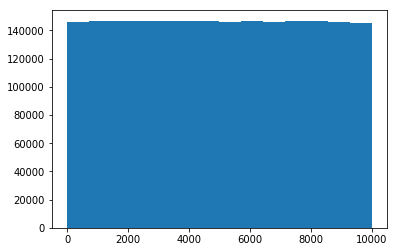

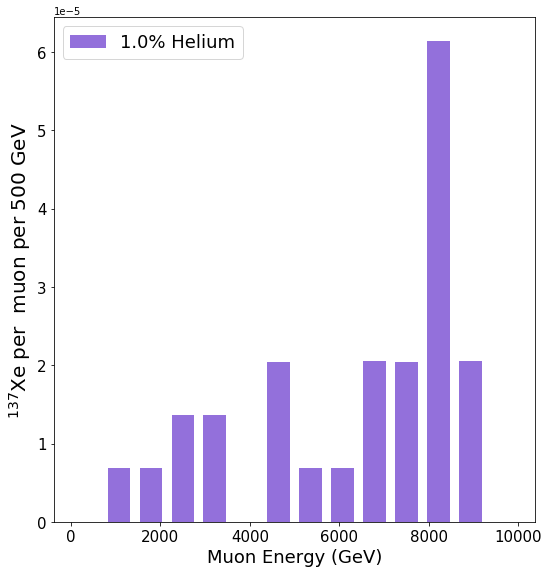

In [39]:
#binning settings
low_lim=1 #GeV
high_lim=10000 #GeV
stp_size=500

numberofmuons=2049000

bins=np.linspace(low_lim,high_lim,15)
nrgs=np.random.uniform(low_lim,high_lim,numberofmuons)
binned_nrgs=plt.hist(nrgs,bins)
binned_Xe137data=plt.hist(muonnrgsproducingXe137withHe3['Xemunrg']*10**-3,bins)
binned_Xe137data[0].sum()

bin_centers = bins[:-1] + np.diff(bins) / 2
plt.figure(figsize=(8,8))


plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.ylabel('$^{137}$Xe per  muon per '+str(stp_size)+ ' GeV',fontsize=20)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15)

#plt.ylim(0,2.75*10**-4)
plt.tight_layout()
#plt.semilogy()
plt.bar(bin_centers,(binned_Xe137data[0]/binned_nrgs[0]),width=stp_size,color="mediumpurple",label="1.0% Helium")    
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(fontsize=18, loc="upper left")
#plt.savefig("xepermuenergHe3.pdf")
plt.show()


965.2142857142857 muon energy not within gransasso energies
1679.4285714285713 muon energy not within gransasso energies
2393.642857142857 muon energy not within gransasso energies
3107.8571428571427 muon energy not within gransasso energies
3822.0714285714284 muon energy not within gransasso energies
4536.285714285714 muon energy not within gransasso energies
5250.5 muon energy not within gransasso energies
5964.714285714285 muon energy not within gransasso energies
6678.928571428571 muon energy not within gransasso energies
7393.142857142857 muon energy not within gransasso energies
8107.357142857142 muon energy not within gransasso energies
8821.571428571428 muon energy not within gransasso energies
9535.785714285714 muon energy not within gransasso energies


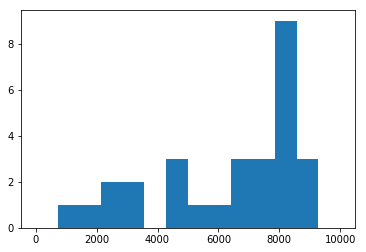

In [40]:
binned_Xe137data=plt.hist(muonnrgsproducingXe137withHe3['Xemunrg']*10**-3,bins)
numofXe137=binned_Xe137data[0] #number in each energy bin
nrgstobin=binned_Xe137data[1] #energies need to normalize with

numofmubins=high_lim*10**3/stp_size

#Muon energy spectrum in GranSasso
data1=np.loadtxt(locat+'muonenergiesfromgransasso.csv',delimiter=',')

proper_nrgs=[]
for x in range(0,len(nrgstobin)-1):
    
    lwnrg=0
    hinrg=0
    nrg=nrgstobin[x]+stp_size/2
    
    for y in range (0,len(data1)-1):
        if data1[y][0] < nrg< data1[y+1][0]:
            lwnrg=y
            hinrg=y+1
    if lwnrg==0 and hinrg==0:            
        print (nrg,"muon energy not within gransasso energies")
        proper_nrgs.append(1000) #DELETE THIS
    else:  
        yo=data1[lwnrg][1] #num of muons / 100 GeV bin
        y1=data1[hinrg][1]
        xo=data1[lwnrg][0] #GeV
        x1=data1[hinrg][0]
        interp_num_of_muons=yo+(nrg-xo)*(y1-yo)/(x1-xo)
        proper_nrgs.append(interp_num_of_muons) #number of muons expect based of Sasso spread, needs to be normalized

        
sassonormalizingmu=np.sum(proper_nrgs)

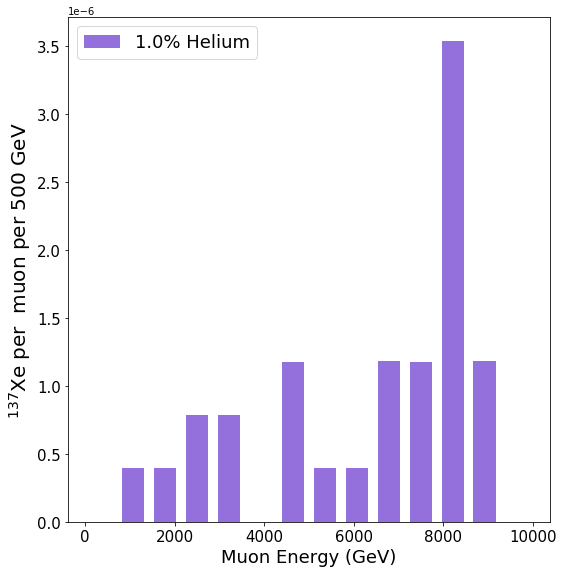

In [41]:
#weighted with gran sasso flux
bin_centers = bins[:-1] + np.diff(bins) / 2
plt.figure(figsize=(8,8))
plt.ylabel('$^{137}$Xe per  muon per '+str(stp_size)+ ' GeV',fontsize=20)
plt.yticks(fontsize=15) 
plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
#plt.ylim(0,10**-5)
#plt.semilogx()
plt.bar(bin_centers,(binned_Xe137data[0]/binned_nrgs[0]*proper_nrgs/sassonormalizingmu),width=stp_size, color="mediumpurple",label="1.0% Helium") 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(fontsize=18, loc="upper left")
#plt.savefig("xepermuenerg_normalizedwithHe3.pdf")

In [42]:
comparXe137=0
for x in range (0, len(binned_Xe137data[0])):
    comparXe137+=binned_Xe137data[0][x]/binned_nrgs[0][x]*proper_nrgs[x]/sassonormalizingmu
    
print ("number of Xe137 per year with 1% Helium =", comparXe137*GranSassoFluxYear)

number of Xe137 per year with 1% Helium = 10.301077321561554


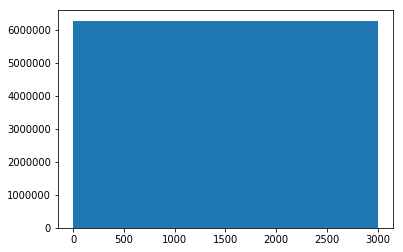

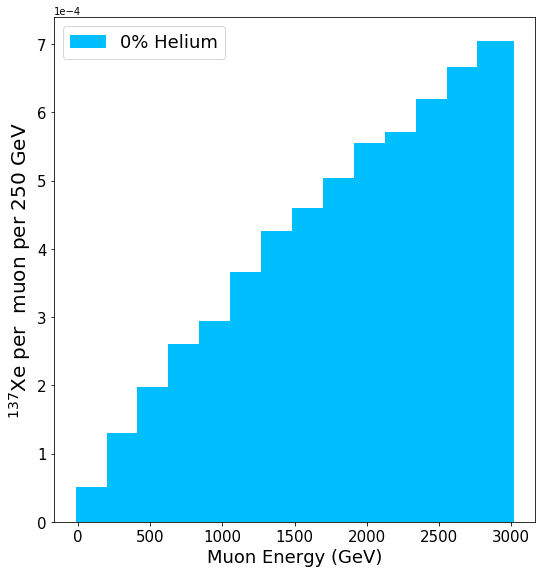

In [43]:
#for no added helium
numberofmuons=87799000
high_lim=3000
stp_size=250
bins=np.linspace(low_lim, high_lim, 15)
nrgs=np.random.uniform(low_lim,high_lim,numberofmuons)
binned_nrgs=plt.hist(nrgs,bins)
muonnrgsproducingXe137=pd.read_hdf(locat+'Xe137Count_sim87799000muons.h5')

binned_Xe137data=plt.hist(muonnrgsproducingXe137['Xemunrg']*10**-3,bins)
binned_Xe137data[0].sum()

bin_centers = bins[:-1] + np.diff(bins) / 2
plt.figure(figsize=(8,8))


plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.ylabel('$^{137}$Xe per  muon per '+str(stp_size)+ ' GeV',fontsize=20)
plt.yticks(fontsize=15) 
plt.xticks(fontsize=15)

plt.tight_layout()
#plt.semilogy()
#plt.ylim(0,2.75*10**-4)
plt.bar(bin_centers,(binned_Xe137data[0]/binned_nrgs[0]),width=stp_size,color="deepskyblue",label="0% Helium")    
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(fontsize=18, loc="upper left")
#plt.savefig("xepermuenergHe3.pdf")
plt.show()



982.8571428571429 muon energy not within gransasso energies
1197.0714285714287 muon energy not within gransasso energies
1411.2857142857142 muon energy not within gransasso energies
1625.5 muon energy not within gransasso energies
1839.7142857142858 muon energy not within gransasso energies
2053.9285714285716 muon energy not within gransasso energies
2268.1428571428573 muon energy not within gransasso energies
2482.357142857143 muon energy not within gransasso energies
2696.5714285714284 muon energy not within gransasso energies
2910.785714285714 muon energy not within gransasso energies


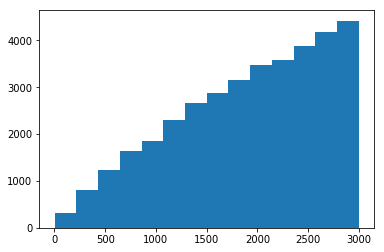

In [44]:
binned_Xe137data=plt.hist(muonnrgsproducingXe137['Xemunrg']*10**-3,bins)
numofXe137=binned_Xe137data[0] #number in each energy bin
nrgstobin=binned_Xe137data[1] #energies need to normalize with

numofmubins=high_lim*10**3/stp_size

#Muon energy spectrum in GranSasso
data1=np.loadtxt(locat+'muonenergiesfromgransasso.csv',delimiter=',')

proper_nrgs=[]
for x in range(0,len(nrgstobin)-1):
    
    lwnrg=0
    hinrg=0
    nrg=nrgstobin[x]+stp_size/2
    
    for y in range (0,len(data1)-1):
        if data1[y][0] < nrg< data1[y+1][0]:
            lwnrg=y
            hinrg=y+1
    if lwnrg==0 and hinrg==0:            
        print (nrg,"muon energy not within gransasso energies")
        proper_nrgs.append(1000) #DELETE THIS
    else:  
        yo=data1[lwnrg][1] #num of muons / 100 GeV bin
        y1=data1[hinrg][1]
        xo=data1[lwnrg][0] #GeV
        x1=data1[hinrg][0]
        interp_num_of_muons=yo+(nrg-xo)*(y1-yo)/(x1-xo)
        proper_nrgs.append(interp_num_of_muons) #number of muons expect based of Sasso spread, needs to be normalized

        
sassonormalizingmu=np.sum(proper_nrgs)

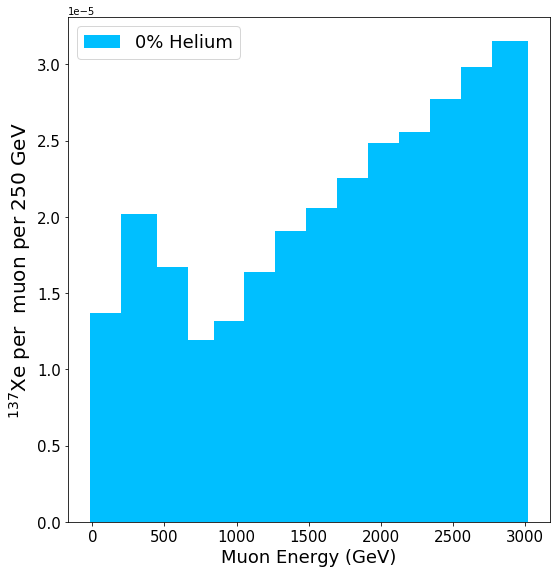

In [45]:
#weighted with gran sasso flux
bin_centers = bins[:-1] + np.diff(bins) / 2
plt.figure(figsize=(8,8))
plt.ylabel('$^{137}$Xe per  muon per '+str(stp_size)+ ' GeV',fontsize=20)
plt.yticks(fontsize=15) 
plt.xlabel('Muon Energy (GeV)',fontsize=18)
plt.xticks(fontsize=15)
plt.tight_layout()
#plt.semilogx()
plt.bar(bin_centers,(binned_Xe137data[0]/binned_nrgs[0]*proper_nrgs/sassonormalizingmu),width=stp_size,color="deepskyblue",label="0% Helium") 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(fontsize=18, loc="upper left")
#plt.savefig("xepermuenerg_normalized.pdf")

In [46]:
comparXe137=0
for x in range (0, len(binned_Xe137data[0])):
    comparXe137+=binned_Xe137data[0][x]/binned_nrgs[0][x]*proper_nrgs[x]/sassonormalizingmu
    
print ("number of Xe137 per year with 0% Helium =", comparXe137*GranSassoFluxYear)

number of Xe137 per year with 0% Helium = 265.19597921004925
